### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [2]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs in as DataFrames

In [12]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("../Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("../Resources/snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [17]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df],axis="columns",join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(ascending=True, inplace=True)

# Set column names to 'FB' 'TWTR', 'SNAP', and 'S&P 500'
combined_df.columns = ["FB","TWTR","SNAP","S&P 500"]

# Display a few rows
combined_df.loc["2017-03-02":"2017-03-08"]

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,136.76,15.79,24.48,2381.919922
2017-03-03,137.17,15.75,27.09,2383.120117
2017-03-06,137.42,15.56,23.77,2375.310059
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-08,137.72,15.24,22.81,2362.979980


### Calculate Daily Returns

In [19]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
returns_df = combined_df.pct_change()
returns_df.loc["2017-03-02":"2017-03-08"]

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [30]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
fb_cov_snp500 = returns_df["FB"].cov(returns_df["S&P 500"])
twtr_cov_snp500 = returns_df["TWTR"].cov(returns_df["S&P 500"])
snap_cov_snp500 = returns_df["SNAP"].cov(returns_df["S&P 500"])

display(fb_cov_snp500)
display(twtr_cov_snp500)
display(snap_cov_snp500)

8.971694582778615e-05

0.00010569463221453385

7.769087430496202e-05

### Calculate Variance of S&P 500 Returns

In [33]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
fb_var = returns_df["FB"].var()
twtr_var = returns_df["TWTR"].var()
snap_var = returns_df["SNAP"].var()
snp500_var = returns_df["S&P 500"].var()

display(snp500_var)

7.00079617330316e-05

### Calculate Beta Values of Social Media Stocks

In [47]:
# Calculate beta of all daily returns of social media stocks
fb_beta = fb_cov_snp500 / snp500_var
twtr_beta = twtr_cov_snp500 / snp500_var
snap_beta = snap_cov_snp500 / snp500_var

print(f"FB:{fb_beta}| TWTR:{twtr_beta}| SNAP:{snap_beta}")

FB:1.2815248952670955| TWTR:1.509751599647906| SNAP:1.1097434117740557


### Calculate 30-Day Rolling Betas of AMZN Returns vs. S&P 500 Returns

date
2017-03-02         NaN
2017-03-03         NaN
2017-03-06         NaN
2017-03-07         NaN
2017-03-08         NaN
                ...   
2019-05-13    0.000049
2019-05-14    0.000047
2019-05-15    0.000048
2019-05-16    0.000051
2019-05-17    0.000052
Name: S&P 500, Length: 557, dtype: float64

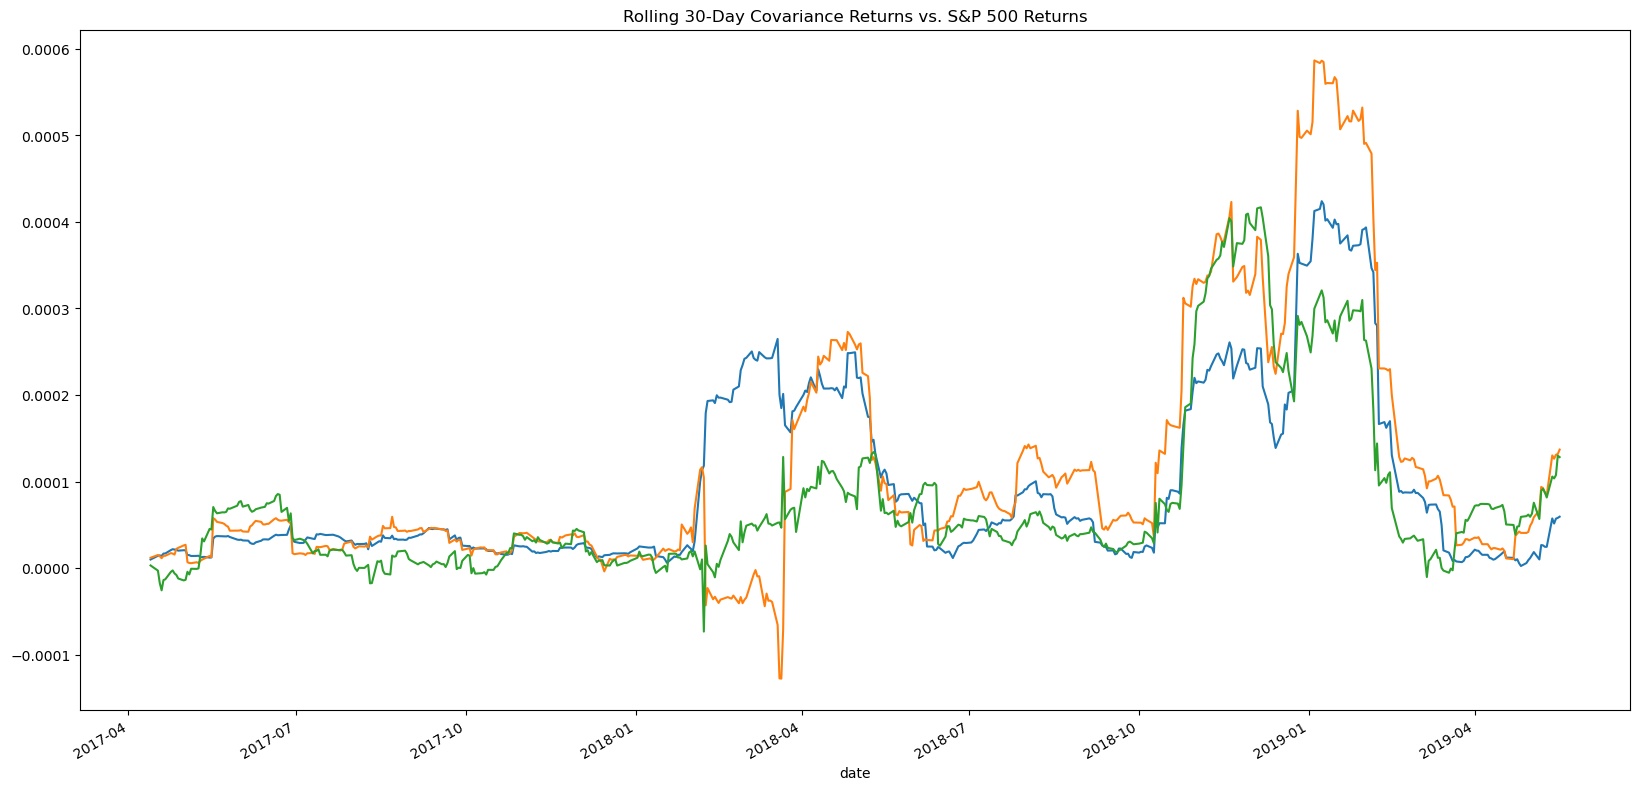

In [46]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
fb_rolling_cov = returns_df["FB"].rolling(window=30).cov(returns_df["S&P 500"])
twtr_rolling_cov = returns_df["TWTR"].rolling(window=30).cov(returns_df["S&P 500"])
snap_rolling_cov = returns_df["SNAP"].rolling(window=30).cov(returns_df["S&P 500"])
# display(fb_rolling_cov)
# display(twtr_rolling_cov)
# display(snap_rolling_cov)

ax = fb_rolling_cov.plot(figsize=(20, 10), title='Rolling 30-Day Covariance Returns vs. S&P 500 Returns')
twtr_rolling_cov.plot(ax=ax)
snap_rolling_cov.plot(ax=ax)

# Calculate 30-day rolling variance of S&P 500
snp500_rolling_var = returns_df["S&P 500"].rolling(window=30).var()
display(snp500_rolling_var)

# Calculate 30-day rolling beta of AMZN and plot the data
fb_rolling_beta = fb_rolling_cov / snp500_rolling_var
twtr_rolling_beta = twtr_rolling_cov / snp500_rolling_var
snap_rolling_beta = snap_rolling_cov / snp500_rolling_var

### Plot Rolling 30-Day Betas of Social Media Stocks

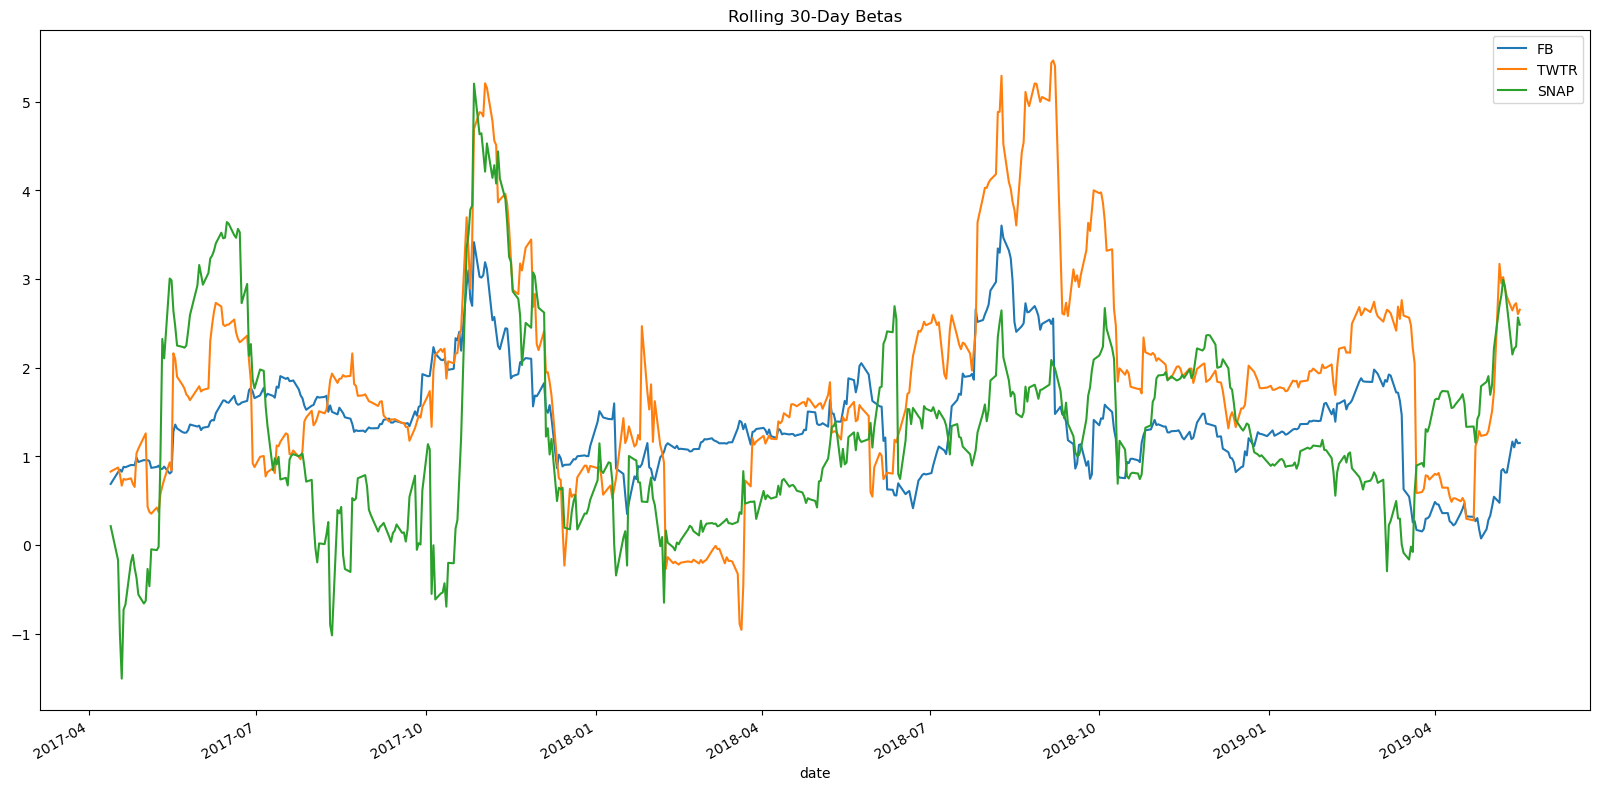

In [39]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = fb_rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Betas')
twtr_rolling_beta.plot(ax=ax)
snap_rolling_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["FB","TWTR","SNAP"])